In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/the-ultimate-film-statistics-dataset-for-ml/movie_statistic_dataset.csv")
df.head(3)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802


# Preprocessing

## Rename Some Columns Name

In [3]:
df.columns

Index(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $'],
      dtype='object')

In [4]:
new_names = {
    'movie_averageRating': 'average_rating',
    'movie_numerOfVotes': 'number_of_votes',
    'approval_Index': 'approval_index',
    'Production budget $': 'production_budget',
    'Domestic gross $': 'domestic_gross',
    'Worldwide gross $': 'worldwide_gross'
}
df = df.rename(columns=new_names)

In [5]:
df.columns

Index(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'average_rating', 'number_of_votes',
       'approval_index', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

## Split Genres
split genres column into its own column for each genre as boolean 

In [6]:
df['genres'] = df['genres'].str.split(',', expand=False)

In [7]:
unique_genres = set()
for genre in df['genres']:
    unique_genres.update(genre)
    
unique_genres = list(unique_genres)
unique_genres.remove('\\N')
unique_genres

['Thriller',
 'Animation',
 'Sci-Fi',
 'Western',
 'War',
 'Horror',
 'Action',
 'Drama',
 'News',
 'Romance',
 'Adventure',
 'Family',
 'History',
 'Sport',
 'Fantasy',
 'Crime',
 'Film-Noir',
 'Documentary',
 'Musical',
 'Music',
 'Biography',
 'Mystery',
 'Comedy']

In [8]:
for genre in unique_genres:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)

## Reformat Date Style

In [9]:
df['production_date'] = pd.to_datetime(df['production_date'])

In [10]:
df.head(3)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,average_rating,number_of_votes,...,Sport,Fantasy,Crime,Film-Noir,Documentary,Musical,Music,Biography,Mystery,Comedy
0,Avatar: The Way of Water,2022-12-09,"[Action, Adventure, Fantasy]",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,...,0,1,0,0,0,0,0,0,0,0
1,Avengers: Endgame,2019-04-23,"[Action, Adventure, Drama]",181.0,-,-,-,-,8.4,1143642.0,...,0,0,0,0,0,0,0,0,0,0
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"[Action, Adventure, Fantasy]",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,...,0,1,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

## Rating

movie rating distribution

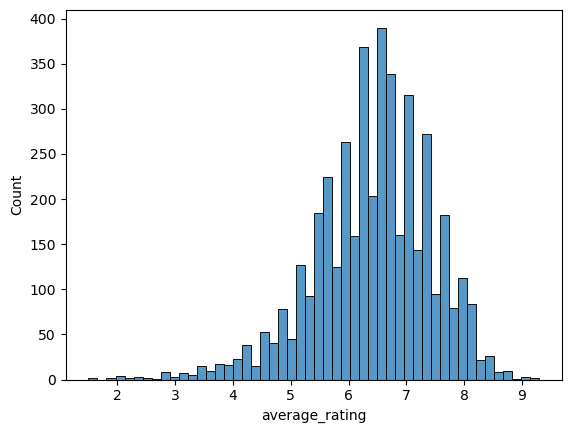

In [11]:
sns.histplot(data=df, x='average_rating')
plt.show()

average rating by year

In [12]:
df['production_year'] = df['production_date'].dt.year
df.head(1)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,average_rating,number_of_votes,...,Fantasy,Crime,Film-Noir,Documentary,Musical,Music,Biography,Mystery,Comedy,production_year
0,Avatar: The Way of Water,2022-12-09,"[Action, Adventure, Fantasy]",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,...,1,0,0,0,0,0,0,0,0,2022


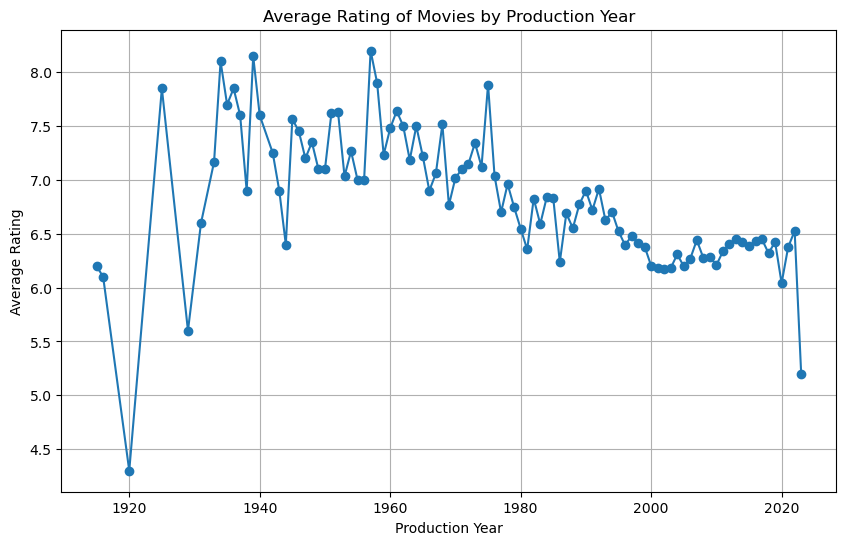

In [13]:
# Group the DataFrame by the production year and calculate the mean of 'averageRating' for each year
average_rating_by_year = df.groupby('production_year')['average_rating'].mean()

# Reset the index to convert the resulting Series back into a DataFrame
average_rating_df = average_rating_by_year.reset_index()

# Plotting the average rating by production year using a line plot
plt.figure(figsize=(10, 6))
plt.plot(average_rating_df['production_year'], average_rating_df['average_rating'], marker='o', linestyle='-')
plt.xlabel('Production Year')
plt.ylabel('Average Rating')
plt.title('Average Rating of Movies by Production Year')
plt.grid(True)
plt.show()

In [14]:
average_rating_df = average_rating_df.sort_values(by=['average_rating'], ascending=False)
average_rating_df.head()

,production_year,average_rating
29,1957,8.200000
12,1939,8.150000
7,1934,8.100000
30,1958,7.900000
47,1975,7.885714


## Number of Votes

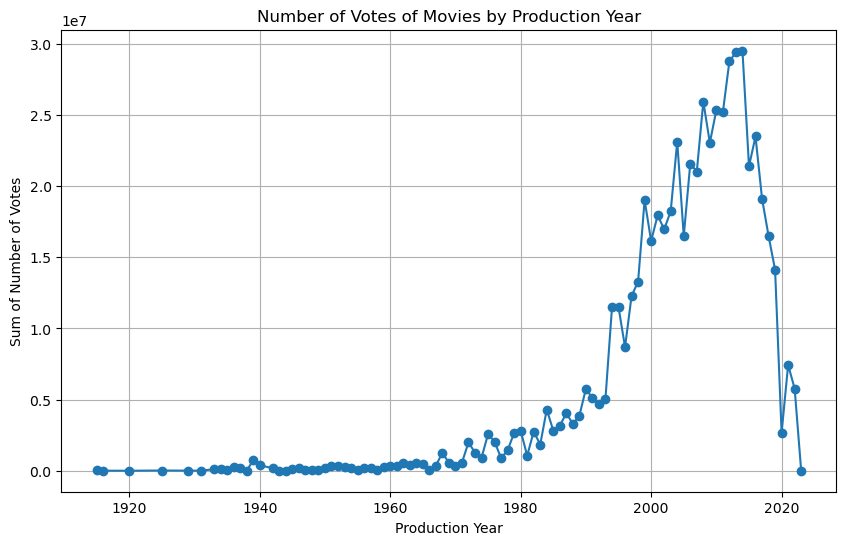

In [15]:
sum_num_of_votes = df.groupby('production_year')['number_of_votes'].sum()
sum_num_of_votes = sum_num_of_votes.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(sum_num_of_votes['production_year'], sum_num_of_votes['number_of_votes'], marker='o', linestyle='-')
plt.xlabel('Production Year')
plt.ylabel('Sum of Number of Votes')
plt.title('Number of Votes of Movies by Production Year')
plt.grid(True)
plt.show()

In [16]:
sum_num_of_votes = sum_num_of_votes.sort_values(by=['number_of_votes'], ascending=False)
sum_num_of_votes.head()

,production_year,number_of_votes
86,2014,29510783.0
85,2013,29392325.0
84,2012,28778493.0
80,2008,25938675.0
82,2010,25348581.0


the best year of movie production

i will multiply the sum of number of votes with the average rating (number_of_votes x average_rating). the highest value i will consider it as the best year

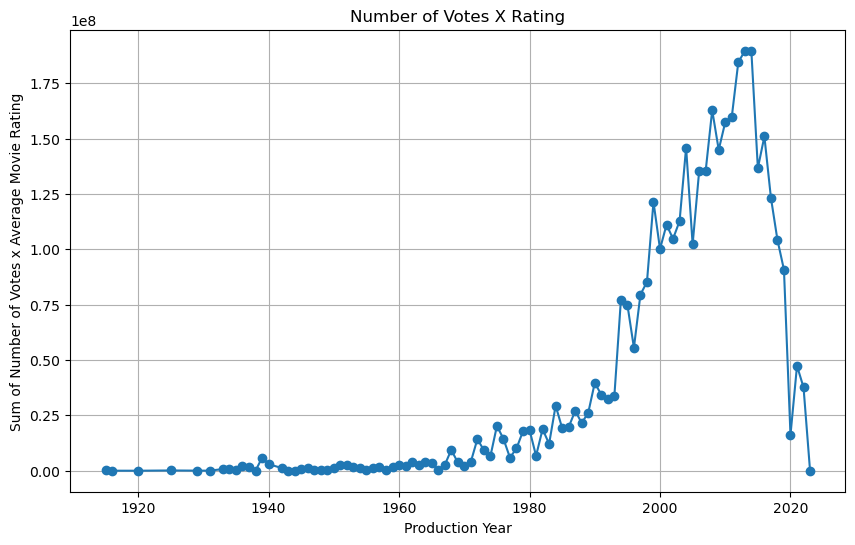

In [17]:
sum_num_of_votes = df.groupby('production_year')['number_of_votes'].sum()
sum_num_of_votes = sum_num_of_votes.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(sum_num_of_votes['production_year'], (sum_num_of_votes['number_of_votes'] * average_rating_df['average_rating']), marker='o', linestyle='-')
plt.xlabel('Production Year')
plt.ylabel('Sum of Number of Votes x Average Movie Rating')
plt.title('Number of Votes X Rating')
plt.grid(True)
plt.show()

In [18]:
rating_numVotes = pd.DataFrame({
    'production_year': sum_num_of_votes['production_year'],
    'rating_numVotes': (sum_num_of_votes['number_of_votes'] * average_rating_df['average_rating'])
})
rating_numVotes = rating_numVotes.sort_values(by=['rating_numVotes'], ascending=False)
rating_numVotes.head()

,production_year,rating_numVotes
86,2014,1.896389e+08
85,2013,1.895331e+08
84,2012,1.844222e+08
80,2008,1.628016e+08
83,2011,1.597029e+08


## Director

director with highest average movie rating

In [19]:
by_director = df.groupby('director_name')['average_rating'].mean()
by_director = by_director.reset_index()
by_director = by_director.sort_values(by=['average_rating'], ascending=False)
by_director.head(10)

,director_name,average_rating
1625,Steve Kopera,9.0
1699,Tim Martin Crouse,8.7
977,Kiran Nakti,8.6
1178,Michael P. Nash,8.6
315,Dana Kjeldsen,8.5
1745,Tony Kaye,8.5
1822,Yann Arthus-Bertrand,8.5
221,Charles Chaplin,8.5
1266,Nitesh Tiwari,8.3
1068,Marius A. Markevicius,8.3


movie with highest rating and number of votes > 1 million

In [20]:
best = df.loc[(df['average_rating']>8.8) & (df['number_of_votes'] > 1000_000), ['movie_title', 'production_year', 'average_rating', 'number_of_votes']]
best.sort_values(by=['average_rating', 'number_of_votes'], ascending=False)

,movie_title,production_year,average_rating,number_of_votes
2074,The Shawshank Redemption,1994,9.3,2695887.0
3463,The Godfather,1972,9.2,1870922.0
88,The Dark Knight,2008,9.0,2669915.0
427,The Lord of the Rings: The Return of the King,2003,9.0,1857170.0
3386,Pulp Fiction,1994,8.9,2069502.0


director with the most number of movies in Top 100

In [21]:
rating_sorted = df.sort_values(by='average_rating', ascending=False).reset_index()

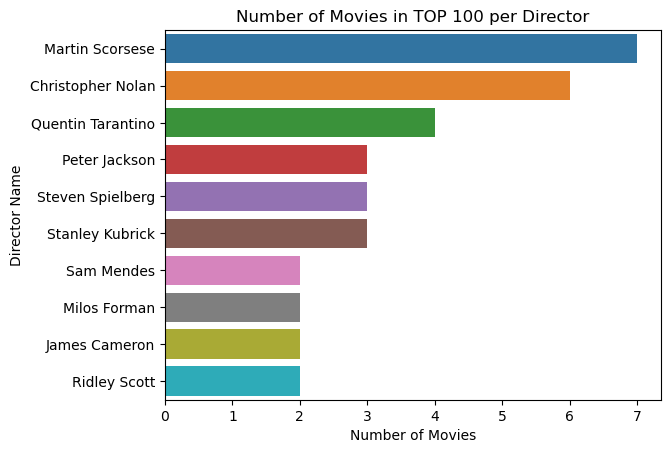

In [22]:
# Get TOP 100 Movies
by_director = rating_sorted[:100].groupby('director_name')['movie_title']

# Sort by the number of movies they have
movies_per_director = by_director.count().reset_index()
movies_per_director = movies_per_director.sort_values(by='movie_title', ascending=False)

# delete unknown director
movies_per_director= movies_per_director[movies_per_director['director_name'] != '-']

# show the top 10
sns.barplot(data=movies_per_director[:10], x='movie_title', y='director_name')
plt.title("Number of Movies in TOP 100 per Director")
plt.xlabel("Number of Movies")
plt.ylabel("Director Name")
plt.show()

## Worldwide Gross

total of wordwide gross by year

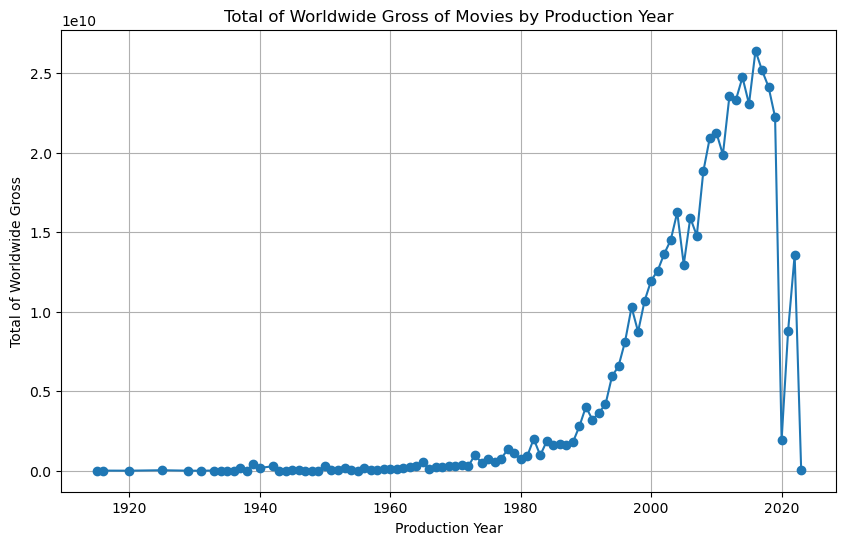

In [23]:
worldwide_gross = df.groupby('production_year')['worldwide_gross'].sum()
worldwide_gross = worldwide_gross.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(worldwide_gross['production_year'], worldwide_gross['worldwide_gross'], marker='o', linestyle='-')
plt.xlabel('Production Year')
plt.ylabel('Total of Worldwide Gross')
plt.title('Total of Worldwide Gross of Movies by Production Year')
plt.grid(True)
plt.show()

In [24]:
best = df.loc[:, ['movie_title', 'production_year', 'average_rating', 'worldwide_gross']]
best.sort_values(by=['worldwide_gross'], ascending=False)

,movie_title,production_year,average_rating,worldwide_gross
20,Avatar,2009,7.9,2923706026
1,Avengers: Endgame,2019,8.4,2794731755
0,Avatar: The Way of Water,2022,7.8,2265935552
43,Titanic,1997,7.9,2222759773
4,Avengers: Infinity War,2018,8.4,2048359754
...,...,...,...,...
4288,Born to Fly: Elizabeth Streb vs. Gravity,2014,6.7,1822
4316,The Looking Glass,2015,6.0,1711
4224,In Her Line of Fire,2006,3.6,884
4289,Higher Power,2018,4.4,528


worldwide gross correlation with average rating and number of votes

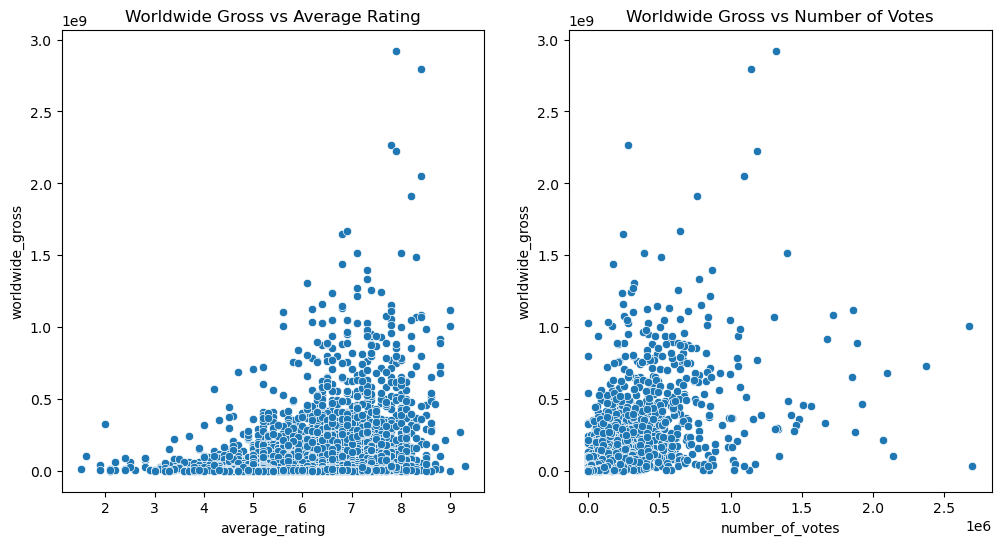

In [25]:
# Create a 1x2 grid for the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph in the left subplot
sns.scatterplot(data=df, y='worldwide_gross', x='average_rating', ax=axs[0])
axs[0].set_title('Worldwide Gross vs Average Rating')

# Plot the second graph in the right subplot
sns.scatterplot(data=df, y='worldwide_gross', x='number_of_votes', ax=axs[1])
axs[1].set_title('Worldwide Gross vs Number of Votes')

# Display the subplots
plt.show()

## Runtime Minutes

runtime minutes distribution

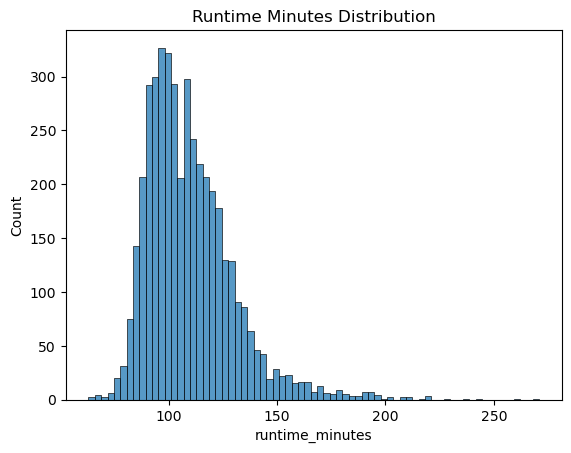

In [26]:
sns.histplot(data=df, x='runtime_minutes')
plt.title('Runtime Minutes Distribution')
plt.show()

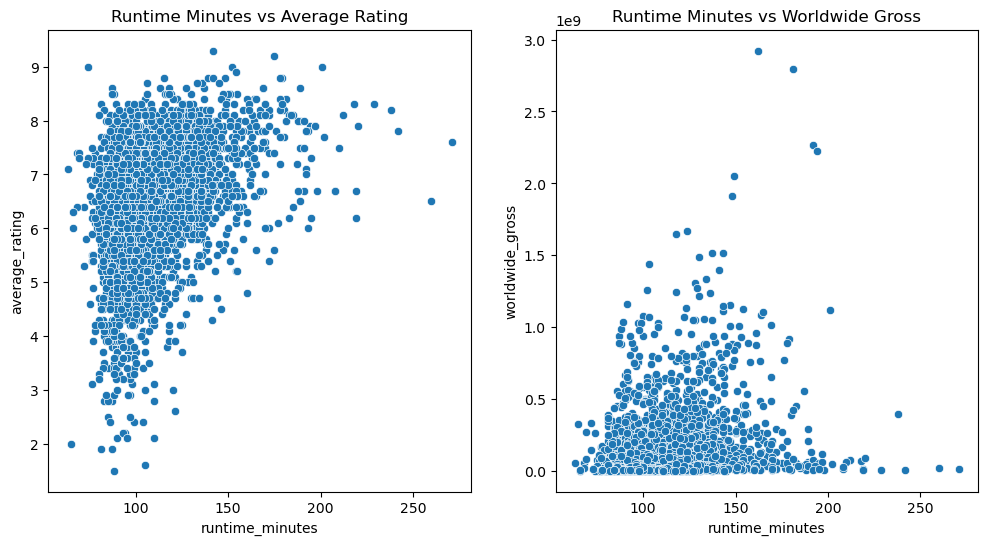

In [27]:
# Create a 1x2 grid for the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph in the left subplot
sns.scatterplot(data=df, x='runtime_minutes', y='average_rating', ax=axs[0])
axs[0].set_title('Runtime Minutes vs Average Rating')

# Plot the second graph in the right subplot
sns.scatterplot(data=df, x='runtime_minutes', y='worldwide_gross', ax=axs[1])
axs[1].set_title('Runtime Minutes vs Worldwide Gross')

# Display the subplots
plt.show()

based on visualization above, we can conclude that runtime minutes has a low correlation with average rating and worldwide gross

## Genres

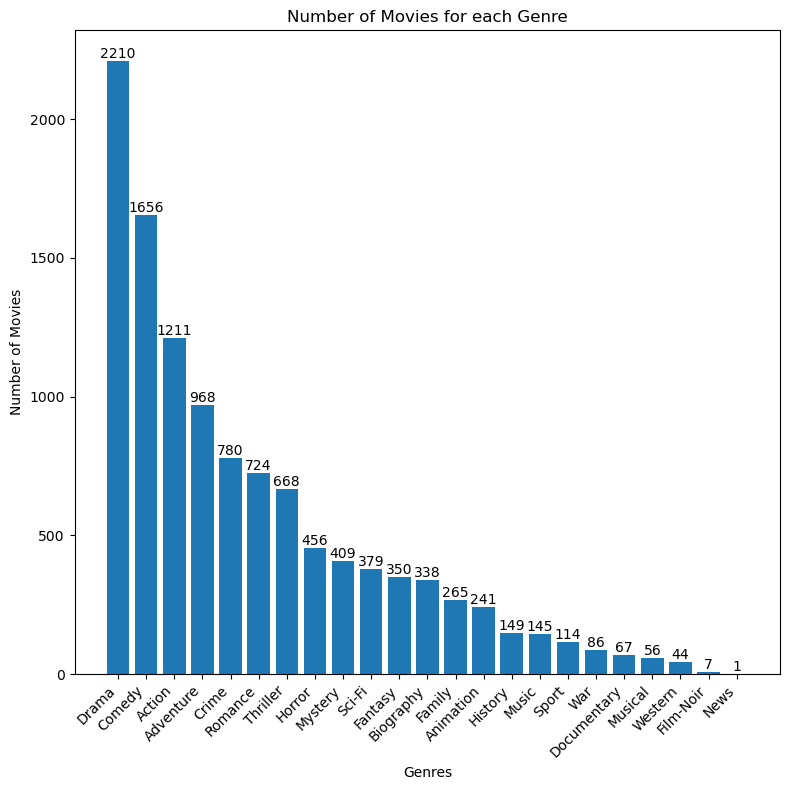

In [28]:
# Count the number of 1s in each binary column
ones_count = df[unique_genres].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(8, 8))
bars = plt.bar(ones_count.index, ones_count.values)

# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies for each Genre')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing between elements
plt.show()

Most genre in top 100 movies

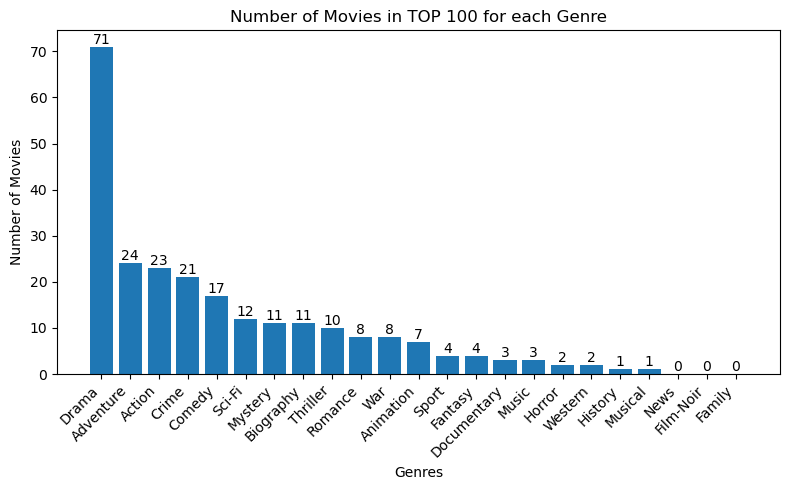

In [29]:
# Count the number of 1s in each binary column
ones_count = rating_sorted[:100][unique_genres].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(ones_count.index, ones_count.values)

# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in TOP 100 for each Genre')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing between elements
plt.show()

## My Favorite Director

In [30]:
nolan_movies = df.loc[df['director_name']=='Christopher Nolan', :]
nolan_movies = nolan_movies.sort_values(by='average_rating', ascending=False)
nolan_movies = nolan_movies.drop(['director_professions', 'director_birthYear', 'director_deathYear'], axis=1)

In [31]:
nolan_movies

,movie_title,production_date,genres,runtime_minutes,director_name,average_rating,number_of_votes,approval_index,production_budget,domestic_gross,...,Fantasy,Crime,Film-Noir,Documentary,Musical,Music,Biography,Mystery,Comedy,production_year
88,The Dark Knight,2008-07-11,"[Action, Crime, Drama]",152.0,Christopher Nolan,9.0,2669915.0,9.666757,185000000,534987076,...,0,1,0,0,0,0,0,0,0,2008
154,Inception,2010-07-16,"[Action, Adventure, Sci-Fi]",148.0,Christopher Nolan,8.8,2368570.0,9.371470,160000000,292576195,...,0,0,0,0,0,0,0,0,0,2010
148,Interstellar,2014-11-05,"[Adventure, Drama, Sci-Fi]",169.0,Christopher Nolan,8.6,1852238.0,8.999899,165000000,188017894,...,0,0,0,0,0,0,0,0,0,2014
1354,The Prestige,2006-10-20,"[Drama, Mystery, Sci-Fi]",130.0,Christopher Nolan,8.5,1342184.0,8.692281,40000000,53089891,...,0,0,0,0,0,0,0,1,0,2006
22,The Dark Knight Rises,2012-07-19,"[Action, Drama]",164.0,Christopher Nolan,8.4,1715219.0,8.740035,230000000,448139099,...,0,0,0,0,0,0,0,0,0,2012
182,Batman Begins,2005-06-15,"[Action, Crime, Drama]",140.0,Christopher Nolan,8.2,1480348.0,8.439954,150000000,205343774,...,0,1,0,0,0,0,0,0,0,2005
183,Dunkirk,2017-07-18,"[Action, Drama, History]",106.0,Christopher Nolan,7.8,667722.0,7.564913,150000000,190068280,...,0,0,0,0,0,0,0,0,0,2017
40,Tenet,2020-08-26,"[Action, Sci-Fi, Thriller]",150.0,Christopher Nolan,7.3,514633.0,6.931662,205000000,58504105,...,0,0,0,0,0,0,0,0,0,2020
1182,Insomnia,2002-05-24,"[Drama, Mystery, Thriller]",118.0,Christopher Nolan,7.2,299055.0,6.547345,46000000,67263182,...,0,0,0,0,0,0,0,1,0,2002
